In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


In [7]:
# Load the dataset
df = pd.read_csv('acc_18.csv')

# Display the first few rows
print(df.head())

# Check the columns
print("Column names:", df.columns.tolist())


        CASENUM  REGION  PSU   PJ  PSU_VAR  URBANICITY  STRATUM  VE_TOTAL  \
0  201800381338       4   56  208      208           1        9         4   
1  201800381366       4   56  214      214           1        7         3   
2  201800381374       4   56  214      214           1        6         2   
3  201800383118       4   56  209      209           1       10         2   
4  201800383942       4   64  306       64           1        6         2   

   VE_FORMS  PVH_INVL  ...  MANCOL_IM  RELJCT1_IM  RELJCT2_IM  LGTCON_IM  \
0         4         0  ...          1           0           1          1   
1         3         0  ...          1           0           1          1   
2         2         0  ...          7           0           1          2   
3         2         0  ...          6           0           2          1   
4         2         0  ...          7           0           1          1   

   WEATHR_IM  MAXSEV_IM  NO_INJ_IM  ALCHL_IM  PSUSTRAT      WEIGHT  
0          

In [8]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
CASENUM       0
REGION        0
PSU           0
PJ            0
PSU_VAR       0
URBANICITY    0
STRATUM       0
VE_TOTAL      0
VE_FORMS      0
PVH_INVL      0
PEDS          0
PERMVIT       0
PERNOTMVIT    0
NUM_INJ       0
MONTH         0
YEAR          0
DAY_WEEK      0
HOUR          0
MINUTE        0
HARM_EV       0
ALCOHOL       0
MAX_SEV       0
MAN_COLL      0
RELJCT1       0
RELJCT2       0
TYP_INT       0
WRK_ZONE      0
REL_ROAD      0
LGT_COND      0
WEATHER1      0
WEATHER2      0
WEATHER       0
SCH_BUS       0
INT_HWY       0
CF1           0
CF2           0
CF3           0
WKDY_IM       0
HOUR_IM       0
MINUTE_IM     0
EVENT1_IM     0
MANCOL_IM     0
RELJCT1_IM    0
RELJCT2_IM    0
LGTCON_IM     0
WEATHR_IM     0
MAXSEV_IM     0
NO_INJ_IM     0
ALCHL_IM      0
PSUSTRAT      0
WEIGHT        0
dtype: int64


In [9]:
# --------------------- DATETIME HANDLING ---------------------
# Create a datetime column from YEAR, MONTH, HOUR, MINUTE (day set to 1 as placeholder)
df['datetime'] = pd.to_datetime(dict(year=df.YEAR, month=df.MONTH, day=1, hour=df.HOUR, minute=df.MINUTE))

# Extract hour and day of week from datetime
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()

# --------------------- DATA CLEANING ---------------------
# Drop rows with missing or invalid latitude/longitude or weather/road info
df.dropna(subset=['WEATHER', 'LGT_COND'], inplace=True)
df = df[(df['WEATHER'] != 0) & (df['LGT_COND'] != 0)]
df = df[(df['latitude'] != 0) & (df['longitude'] != 0)] if 'latitude' in df.columns and 'longitude' in df.columns else df


<ipython-input-10-6dc0f9a0de40>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LGT_COND', data=df, palette='viridis')


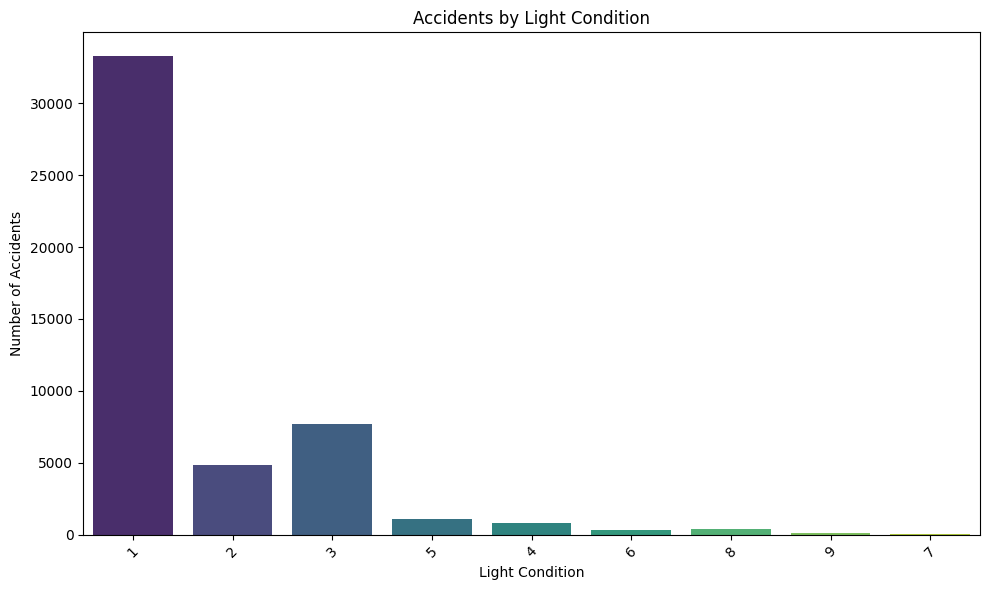

In [10]:
# --------------------- OPTIONAL: Map Encoded Values ---------------------
# You can map numeric values to meaningful labels if you have a codebook
# For demo, we'll treat WEATHER and LGT_COND as categorical
df['WEATHER'] = df['WEATHER'].astype(str)
df['LGT_COND'] = df['LGT_COND'].astype(str)

# --------------------- VISUALIZATION: ROAD CONDITIONS ---------------------
plt.figure(figsize=(10, 6))
sns.countplot(x='LGT_COND', data=df, palette='viridis')
plt.title('Accidents by Light Condition')
plt.xlabel('Light Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



<ipython-input-11-4fbd2c3b92a9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='WEATHER', data=df, palette='viridis')


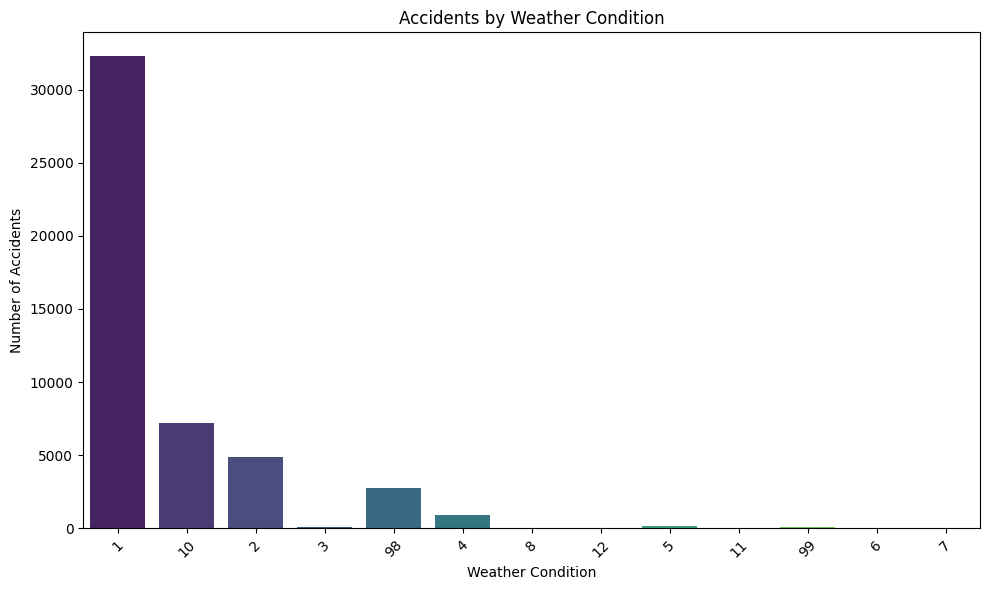

In [11]:
# --------------------- VISUALIZATION: WEATHER CONDITIONS ---------------------
plt.figure(figsize=(10, 6))
sns.countplot(x='WEATHER', data=df, palette='viridis')
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [12]:
# --------------------- HEATMAP ---------------------
if 'latitude' in df.columns and 'longitude' in df.columns:
    # Create map centered around the mean location
    accident_map = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

    # Prepare data for HeatMap
    heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
    HeatMap(heat_data).add_to(accident_map)

    # Save map to HTML
    accident_map.save('accident_heatmap.html')
    print("Heatmap saved as 'accident_heatmap.html'")
else:
    print("Latitude and Longitude columns not found in the dataset.")

Latitude and Longitude columns not found in the dataset.
